In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import uns
import pandas as pd
import os

tr = pd.read_msgpack('trainvalidate.bin')

folder = '/home/chrisv/code/train_output'
pattern = os.path.join(folder, '{}_prediction.npy')



chrisv on Lubuntu


In [2]:
batch = uns.batch(tr.loc[:6], pred=pattern)

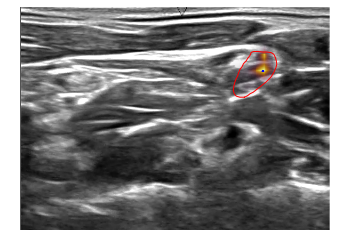

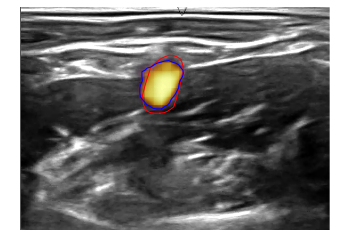

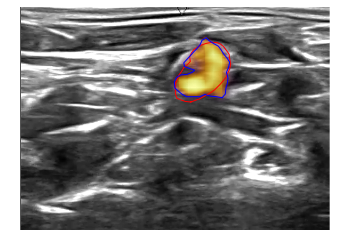

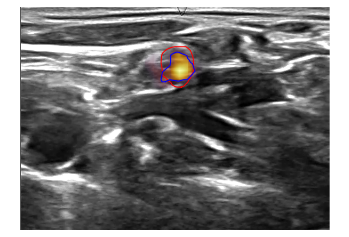

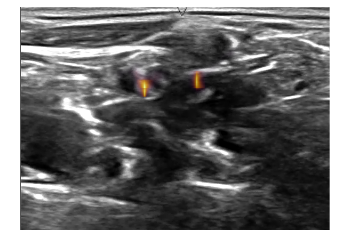

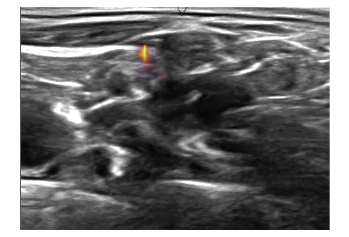

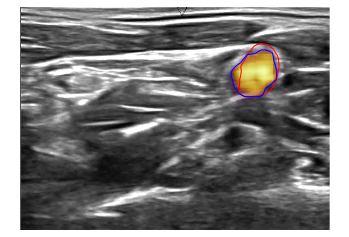

In [3]:
for im in batch:
    im.new_prediction('cutoff50', lambda x:x>0.5)
    im.plot_heatmap()